In [1]:
#%%
import pims
import numpy as np
import scipy.io as sio
from greedyROI2d import greedyROI2d
from arpfit import arpfit
from sklearn.decomposition import ProjectedGradientNMF
from update_spatial_components import update_spatial_components
from update_temporal_components import update_temporal_components
from matplotlib import pyplot as plt
from time import time
from merge_rois import mergeROIS
#import libtiff
from utilities import *
from scipy.sparse import coo_matrix
%matplotlib inline

In [2]:
#t = libtiff.TiffFile('demoMovie.tif') 
#t = libtiff.TiffFile('/Users/eftychios/Documents/_code/calcium_paper_code/datasets/clay/2014-04-05-003.tif')
#tt = t.get_tiff_array() 
#Y2 = tt[:]*1.
#Y = np.transpose(Y2,(1,2,0))

Ymat = sio.loadmat('Y.mat')
Y = Ymat['Y']*1.
sizeY = np.shape(Y)
d1 = sizeY[0]
d2 = sizeY[1]
T = sizeY[-1]

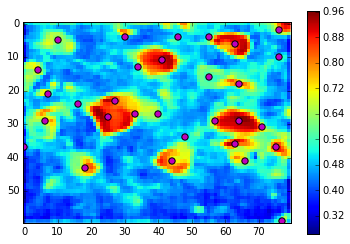

In [3]:
nr = 30
t1 = time()
Ain,Cin,center = greedyROI2d(Y, nr = nr, gSig = [4,4], gSiz = [9,9], use_median = False)
t_elGREEDY = time()-t1

#%% plot centers
Cn = local_correlations(Y)
plt1 = plt.imshow(Cn,interpolation='none')
plt.colorbar()

plt.scatter(x=center[:,1], y=center[:,0], c='m', s=40)
plt.axis((-0.5,d2-0.5,-0.5,d1-0.5))
plt.gca().invert_yaxis()

In [4]:
active_pixels = np.squeeze(np.nonzero(np.sum(Ain,axis=1)))
Yr = np.reshape(Y,(d1*d2,T),order='F')
p = 2;
P = arpfit(Yr,p=2,pixels = active_pixels)
Y_res = Yr - np.dot(Ain,Cin)
model = ProjectedGradientNMF(n_components=1, init='random', random_state=0)
model.fit(np.maximum(Y_res,0))

fin = model.components_.squeeze()

In [5]:
t1 = time()
A,b = update_spatial_components(Yr, Cin, fin, Ain, d1=d1, d2=d2, sn = P['sn'])
t_elSPATIAL = time() - t1

1000
2000
3000
4000
Updated Spatial Components
--- 7.01998090744 seconds ---


update_spatial_components.py:453: RuntimeWarning: invalid value encountered in divide
  gamma_plus = (lambda_ - dQ)/(one_vec + dQa);
update_spatial_components.py:453: RuntimeWarning: divide by zero encountered in divide
  gamma_plus = (lambda_ - dQ)/(one_vec + dQa);


In [6]:
t1 = time()
C,f,Y_res,Pnew = update_temporal_components(Yr,A,b,Cin,fin,ITER=2,deconv_method = 'spgl1')
t_elTEMPORAL2 = time() - t1

0 out of total 31 temporal components updated 

W: Linesearch failed with error 1Damping max BB scaling to 10000.0
W: Linesearch failed with error 1Damping max BB scaling to 1000.0
W: Linesearch failed with error 1Damping max BB scaling to 100.0
W: Linesearch failed with error 1Damping max BB scaling to 10.0
W: Linesearch failed with error 1Damping max BB scaling to 1.0
10 out of total 31 temporal components updated 

W: Linesearch failed with error 1Damping max BB scaling to 10000.0
W: Linesearch failed with error 1Damping max BB scaling to 1000.0
W: Linesearch failed with error 1Damping max BB scaling to 100.0
W: Linesearch failed with error 1Damping max BB scaling to 10.0
W: Linesearch failed with error 1Damping max BB scaling to 1.0
W: Linesearch failed with error 1Damping max BB scaling to 0.1
20 out of total 31 temporal components updated 

30 out of total 31 temporal components updated 

0 out of total 31 temporal components updated 

10 out of total 31 temporal components updat

In [7]:
t1 = time()
A_m,C_m,nr_m,merged_ROIs,P_m=mergeROIS(Y_res,A.tocsc(),b,np.array(C),f,d1,d2,Pnew,sn=P['sn'])
t_elMERGE = time() - t1

/Users/epnevmatikakis/anaconda/lib/python2.7/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)
/Users/epnevmatikakis/anaconda/lib/python2.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:90: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


0 1
0 2
1 2
0 1
0 1
0 out of total 2 temporal components updated 

Updated Spatial Components
--- 0.597563028336 seconds ---
0 out of total 2 temporal components updated 

0 out of total 2 temporal components updated 

Updated Spatial Components
--- 0.479974031448 seconds ---
0 out of total 2 temporal components updated 

0 out of total 2 temporal components updated 

2000
Updated Spatial Components
--- 0.549482822418 seconds ---
0 out of total 2 temporal components updated 



constrained_foopsi.py:231: UserWarning: Original problem infeasible. Adjusting noise level and re-solving
  warn('Original problem infeasible. Adjusting noise level and re-solving')


In [8]:
A2,b2 = update_spatial_components(Yr, C_m, f, A_m, d1=d1, d2=d2, sn = P['sn'])
C2,f2,Y_res2,Pnew2 = update_temporal_components(Yr,A2,b2,C_m,f,ITER=2,deconv_method = 'spgl1')

1000
2000
3000
4000
Updated Spatial Components
--- 7.32740902901 seconds ---
W: Linesearch failed with error 1Damping max BB scaling to 10000.0
W: Linesearch failed with error 1Damping max BB scaling to 1000.0
W: Linesearch failed with error 1Damping max BB scaling to 100.0
W: Linesearch failed with error 1Damping max BB scaling to 10.0
W: Linesearch failed with error 1Damping max BB scaling to 1.0
0 out of total 27 temporal components updated 

10 out of total 27 temporal components updated 

SPGL1 produces an error. Using CVXOPT
20 out of total 27 temporal components updated 

0 out of total 27 temporal components updated 

SPGL1 produces an error. Using CVXOPT
10 out of total 27 temporal components updated 

W: Linesearch failed with error 1Damping max BB scaling to 10000.0
W: Linesearch failed with error 1Damping max BB scaling to 1000.0
W: Linesearch failed with error 1Damping max BB scaling to 100.0
W: Linesearch failed with error 1Damping max BB scaling to 10.0
W: Linesearch fai

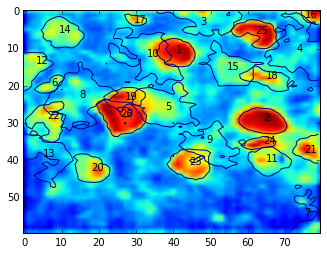

In [9]:
A_or, C_or, srt = order_components(A2,C2)
C_df = extract_DF_F(Yr,A2,C2)
crd = plot_contours(coo_matrix(A_or[:,::-1]),Cn,thr=0.9)